In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [3]:
df = pd.read_csv('./Data/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
df.iloc[:, 12]

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [6]:
# binary classification, muliti classification 두 가지 방식으로 nural network model을 만들고 
# train data로 학습시킨 후 test data로 accuracy를 평가하시오

In [7]:
y = df.iloc[:, 12].values
x = df.iloc[:, :12].values

In [10]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [8]:
y_oh = tf.keras.utils.to_categorical(y)

In [9]:
y_oh

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [10]:
# binary

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [12]:
x.shape

(6497, 12)

In [14]:
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                468       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [16]:
x_train.shape

(4872, 12)

In [17]:
y_train.shape

(4872,)

In [18]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [19]:
model.fit(x_train.astype(float), y_train, epochs=50, batch_size=20)

Epoch 1/50
244/244 [==============================] - 1s 779us/step - loss: 0.2449 - accuracy: 0.9218
Epoch 2/50
244/244 [==============================] - 0s 745us/step - loss: 0.1816 - accuracy: 0.9380
Epoch 3/50
244/244 [==============================] - 0s 740us/step - loss: 0.1508 - accuracy: 0.9489
Epoch 4/50
244/244 [==============================] - 0s 829us/step - loss: 0.1428 - accuracy: 0.9509
Epoch 5/50
244/244 [==============================] - 0s 679us/step - loss: 0.1298 - accuracy: 0.9548
Epoch 6/50
244/244 [==============================] - 0s 706us/step - loss: 0.1168 - accuracy: 0.9594
Epoch 7/50
244/244 [==============================] - 0s 694us/step - loss: 0.1094 - accuracy: 0.9635
Epoch 8/50
244/244 [==============================] - 0s 708us/step - loss: 0.1034 - accuracy: 0.9676
Epoch 9/50
244/244 [==============================] - 0s 683us/step - loss: 0.0953 - accuracy: 0.9688
Epoch 10/50
244/244 [==============================] - 0s 678us/step - loss: 0.093

In [45]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 698us/step - loss: 0.0595 - accuracy: 0.9822


[0.059461187571287155, 0.9821538329124451]

In [ ]:
# multiclassification

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)

In [16]:
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                468       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 2)                 20        
                                                                 
Total params: 1,325
Trainable params: 1,325
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
model.fit(x_train.astype(float), y_train, epochs=50, batch_size=20)

Epoch 1/50
244/244 [==============================] - 0s 743us/step - loss: 0.1968 - accuracy: 0.9358
Epoch 2/50
244/244 [==============================] - 0s 729us/step - loss: 0.1654 - accuracy: 0.9423
Epoch 3/50
244/244 [==============================] - 0s 749us/step - loss: 0.1517 - accuracy: 0.9468
Epoch 4/50
244/244 [==============================] - 0s 748us/step - loss: 0.1386 - accuracy: 0.9530
Epoch 5/50
244/244 [==============================] - 0s 730us/step - loss: 0.1284 - accuracy: 0.9563
Epoch 6/50
244/244 [==============================] - 0s 725us/step - loss: 0.1132 - accuracy: 0.9612
Epoch 7/50
244/244 [==============================] - 0s 730us/step - loss: 0.1082 - accuracy: 0.9649
Epoch 8/50
244/244 [==============================] - 0s 721us/step - loss: 0.0924 - accuracy: 0.9692
Epoch 9/50
244/244 [==============================] - 0s 720us/step - loss: 0.0928 - accuracy: 0.9692
Epoch 10/50
244/244 [==============================] - 0s 723us/step - loss: 0.075

In [20]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 619us/step - loss: 0.0824 - accuracy: 0.9711


[0.08240143209695816, 0.9710769057273865]

In [21]:
model.save('./deep_model/wine_model.h5')

In [22]:
# model checkpointer
# 가장 좋은 결과를 저장

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
# model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [24]:
import os

In [25]:
model_dir = './deep_model/model_check'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [27]:
modelpath = './deep_model/model_check/{epoch:02d}-{val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, \
                               save_best_only=True)

In [28]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=50, epochs=100, \
                    callbacks=[checkpointer])

# val_loss 

Epoch 1/100
67/78 [========================>.....] - ETA: 0s - loss: 4.6073 - accuracy: 0.5904  
Epoch 1: val_loss improved from inf to 0.26128, saving model to ./deep_model/model_check\01-0.261281.hdf5
78/78 [==============================] - 0s 3ms/step - loss: 4.0027 - accuracy: 0.6343 - val_loss: 0.2613 - val_accuracy: 0.9241
Epoch 2/100
67/78 [========================>.....] - ETA: 0s - loss: 0.2419 - accuracy: 0.9173
Epoch 2: val_loss improved from 0.26128 to 0.23594, saving model to ./deep_model/model_check\02-0.235940.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.2323 - accuracy: 0.9220 - val_loss: 0.2359 - val_accuracy: 0.9292
Epoch 3/100
67/78 [========================>.....] - ETA: 0s - loss: 0.2162 - accuracy: 0.9242
Epoch 3: val_loss improved from 0.23594 to 0.21614, saving model to ./deep_model/model_check\03-0.216141.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.2195 - accuracy: 0.9243 - val_loss: 0.2161 - val_accuracy: 0.9333


76/78 [============================>.] - ETA: 0s - loss: 0.0928 - accuracy: 0.9692
Epoch 26: val_loss did not improve from 0.10771
78/78 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9690 - val_loss: 0.1160 - val_accuracy: 0.9610
Epoch 27/100
72/78 [==========================>...] - ETA: 0s - loss: 0.0848 - accuracy: 0.9683
Epoch 27: val_loss improved from 0.10771 to 0.10236, saving model to ./deep_model/model_check\27-0.102355.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9692 - val_loss: 0.1024 - val_accuracy: 0.9723
Epoch 28/100
69/78 [=========================>....] - ETA: 0s - loss: 0.0819 - accuracy: 0.9739
Epoch 28: val_loss improved from 0.10236 to 0.10217, saving model to ./deep_model/model_check\28-0.102174.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0832 - accuracy: 0.9728 - val_loss: 0.1022 - val_accuracy: 0.9723
Epoch 29/100
67/78 [========================>.....] - ETA: 0s - loss

78/78 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9797 - val_loss: 0.0836 - val_accuracy: 0.9774
Epoch 54/100
59/78 [=====================>........] - ETA: 0s - loss: 0.0594 - accuracy: 0.9817
Epoch 54: val_loss did not improve from 0.08000
78/78 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9820 - val_loss: 0.0950 - val_accuracy: 0.9703
Epoch 55/100
60/78 [======================>.......] - ETA: 0s - loss: 0.0585 - accuracy: 0.9833
Epoch 55: val_loss improved from 0.08000 to 0.07965, saving model to ./deep_model/model_check\55-0.079650.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9826 - val_loss: 0.0797 - val_accuracy: 0.9764
Epoch 56/100
63/78 [=======================>......] - ETA: 0s - loss: 0.0495 - accuracy: 0.9860
Epoch 56: val_loss did not improve from 0.07965
78/78 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.1032 - val_accura

Epoch 83/100
74/78 [===========================>..] - ETA: 0s - loss: 0.0482 - accuracy: 0.9857
Epoch 83: val_loss did not improve from 0.07202
78/78 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9859 - val_loss: 0.0822 - val_accuracy: 0.9754
Epoch 84/100
68/78 [=========================>....] - ETA: 0s - loss: 0.0536 - accuracy: 0.9838
Epoch 84: val_loss did not improve from 0.07202
78/78 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0799 - val_accuracy: 0.9754
Epoch 85/100
73/78 [===========================>..] - ETA: 0s - loss: 0.0468 - accuracy: 0.9858
Epoch 85: val_loss did not improve from 0.07202
78/78 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.1954 - val_accuracy: 0.9508
Epoch 86/100
71/78 [==========================>...] - ETA: 0s - loss: 0.0600 - accuracy: 0.9828
Epoch 86: val_loss did not improve from 0.07202
78/78 [==============================

In [29]:
history.history

{'loss': [4.002722263336182,
  0.232268288731575,
  0.21950627863407135,
  0.2122841626405716,
  0.20851540565490723,
  0.20009417831897736,
  0.19248747825622559,
  0.1876549869775772,
  0.1792939305305481,
  0.1694975048303604,
  0.16293767094612122,
  0.15430159866809845,
  0.1457509547472,
  0.13981668651103973,
  0.1353950947523117,
  0.12819963693618774,
  0.1264273226261139,
  0.11875902116298676,
  0.113273024559021,
  0.11405716091394424,
  0.11001941561698914,
  0.10437413305044174,
  0.09844174236059189,
  0.09652316570281982,
  0.09671405702829361,
  0.09247338771820068,
  0.08695551007986069,
  0.08317450433969498,
  0.08853554725646973,
  0.08129402995109558,
  0.0805099830031395,
  0.08063674718141556,
  0.07508327811956406,
  0.07478011399507523,
  0.071299247443676,
  0.07792145758867264,
  0.07331616431474686,
  0.0675165206193924,
  0.06541692465543747,
  0.06431291252374649,
  0.06410380452871323,
  0.06838467717170715,
  0.0636223703622818,
  0.06209674850106239,
 

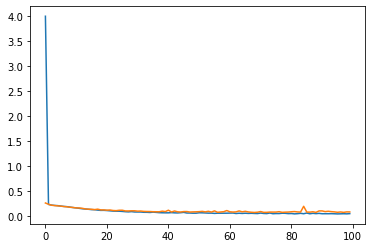

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# val_loss가 더 크면 과적합

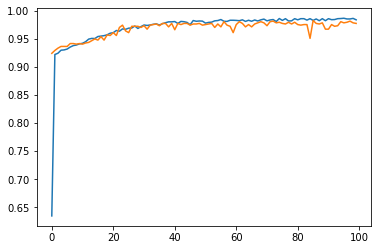

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [32]:
# early stopping

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
# model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=7)

In [36]:
modelpath = './deep_model/model_check/{epoch:02d}-{val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, \
                               save_best_only=True)

In [37]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=50, epochs=200, \
                    callbacks=[checkpointer, early_stopping_callback])

Epoch 1/200
65/78 [========================>.....] - ETA: 0s - loss: 2.1517 - accuracy: 0.7305  
Epoch 1: val_loss improved from inf to 0.24590, saving model to ./deep_model/model_check\01-0.245904.hdf5
78/78 [==============================] - 0s 2ms/step - loss: 1.8362 - accuracy: 0.7629 - val_loss: 0.2459 - val_accuracy: 0.9272
Epoch 2/200
64/78 [=======================>......] - ETA: 0s - loss: 0.2222 - accuracy: 0.9306
Epoch 2: val_loss improved from 0.24590 to 0.21056, saving model to ./deep_model/model_check\02-0.210560.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.2210 - accuracy: 0.9297 - val_loss: 0.2106 - val_accuracy: 0.9262
Epoch 3/200
65/78 [========================>.....] - ETA: 0s - loss: 0.2071 - accuracy: 0.9326
Epoch 3: val_loss improved from 0.21056 to 0.20342, saving model to ./deep_model/model_check\03-0.203420.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.2075 - accuracy: 0.9315 - val_loss: 0.2034 - val_accuracy: 0.9303


66/78 [========================>.....] - ETA: 0s - loss: 0.1060 - accuracy: 0.9658
Epoch 26: val_loss improved from 0.08773 to 0.08256, saving model to ./deep_model/model_check\26-0.082563.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.1065 - accuracy: 0.9659 - val_loss: 0.0826 - val_accuracy: 0.9723
Epoch 27/200
66/78 [========================>.....] - ETA: 0s - loss: 0.1006 - accuracy: 0.9685
Epoch 27: val_loss improved from 0.08256 to 0.07985, saving model to ./deep_model/model_check\27-0.079852.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.1008 - accuracy: 0.9687 - val_loss: 0.0799 - val_accuracy: 0.9651
Epoch 28/200
69/78 [=========================>....] - ETA: 0s - loss: 0.0965 - accuracy: 0.9693
Epoch 28: val_loss improved from 0.07985 to 0.07656, saving model to ./deep_model/model_check\28-0.076556.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.9697 - val_loss: 0.0766 - val_accuracy: 0.9692
Epoch

Epoch 53/200
71/78 [==========================>...] - ETA: 0s - loss: 0.0710 - accuracy: 0.9792
Epoch 53: val_loss did not improve from 0.04534
78/78 [==============================] - 0s 1ms/step - loss: 0.0728 - accuracy: 0.9779 - val_loss: 0.0477 - val_accuracy: 0.9815
Epoch 54/200
71/78 [==========================>...] - ETA: 0s - loss: 0.0658 - accuracy: 0.9811
Epoch 54: val_loss improved from 0.04534 to 0.04411, saving model to ./deep_model/model_check\54-0.044111.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0673 - accuracy: 0.9808 - val_loss: 0.0441 - val_accuracy: 0.9815
Epoch 55/200
62/78 [======================>.......] - ETA: 0s - loss: 0.0780 - accuracy: 0.9755
Epoch 55: val_loss did not improve from 0.04411
78/78 [==============================] - 0s 1ms/step - loss: 0.0715 - accuracy: 0.9766 - val_loss: 0.0449 - val_accuracy: 0.9846
Epoch 56/200
66/78 [========================>.....] - ETA: 0s - loss: 0.0631 - accuracy: 0.9806
Epoch 56: val_loss did

In [42]:
history.history

{'loss': [1.8362171649932861,
  0.22101645171642303,
  0.20752593874931335,
  0.2023998498916626,
  0.1978389322757721,
  0.19467288255691528,
  0.1910099983215332,
  0.18839509785175323,
  0.18396711349487305,
  0.17935608327388763,
  0.17553885281085968,
  0.17033815383911133,
  0.16783657670021057,
  0.15798652172088623,
  0.14773820340633392,
  0.14257194101810455,
  0.13673028349876404,
  0.13472716510295868,
  0.1261930763721466,
  0.12566296756267548,
  0.11913930624723434,
  0.1202542707324028,
  0.11402010172605515,
  0.10858510434627533,
  0.10635822266340256,
  0.10650238394737244,
  0.10079745203256607,
  0.09750794619321823,
  0.09995628148317337,
  0.1023382619023323,
  0.09403134882450104,
  0.08820734173059464,
  0.08672801405191422,
  0.09860642999410629,
  0.09140116721391678,
  0.08269739151000977,
  0.08435942977666855,
  0.08136594295501709,
  0.08132354170084,
  0.07658106833696365,
  0.07693367451429367,
  0.07528558373451233,
  0.07514926791191101,
  0.075399532

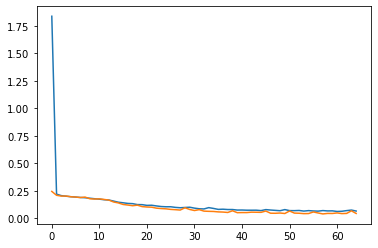

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

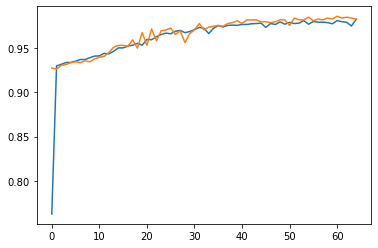

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [40]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 677us/step - loss: 0.0458 - accuracy: 0.9858


[0.04577993229031563, 0.9858461618423462]